In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import rand
from numpy import log, dot, e
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [171]:

x,y=datasets.load_breast_cancer(return_X_y=True, as_frame=True)

In [172]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [173]:
x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [174]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [175]:
colname=x.columns
#colname

# Split Data

In [176]:
#split data
X_train_0, X_test_0, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)
print("X_train_0.shape, y_train.shape", X_train_0.shape, y_train.shape)
print("X_test_0.shape, y_test.shape", X_test_0.shape, y_test.shape)

X_train_0.shape, y_train.shape (398, 30) (398,)
X_test_0.shape, y_test.shape (171, 30) (171,)


# Feature Scalling

In [177]:
np.random.seed(0)
#s=StandardScaler()
c=RobustScaler()


In [178]:
x_train = c.fit_transform(X_train_0)
x_text= c.transform(X_test_0)

In [179]:
df_xtest=pd.DataFrame(x_text,columns=colname)
#df_xtest

# EDA

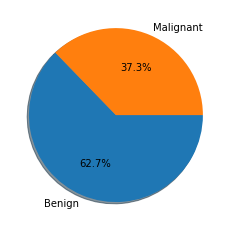

In [180]:
#number of two target class'Benign',1:'Malignant'
y=pd.DataFrame(y,columns=['target'])
classes={}
classes['Benign']=np.sum(y['target']==0)
classes['Malignant']=np.sum(y['target']==1)
plt.pie(y['target'].value_counts(),labels=classes.keys(), counterclock=False, shadow=True,autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [181]:
df_x_train=X_train_0.copy()  #copy from the original data

# concat feature with target to show the relations between features and there target

In [182]:
df=pd.concat([df_x_train,y_train],axis=1)
names=df.columns
#names

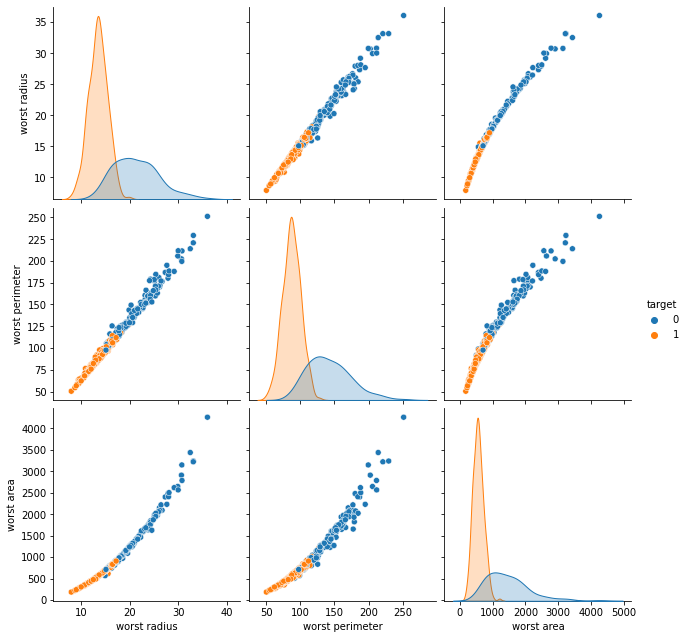

In [183]:
df_pair = df.loc[:,['worst radius','worst perimeter','worst area','target']]

sns.pairplot(df_pair, hue = 'target', height = 3)

In [184]:
#from the prevoius plot there are linearity on some features

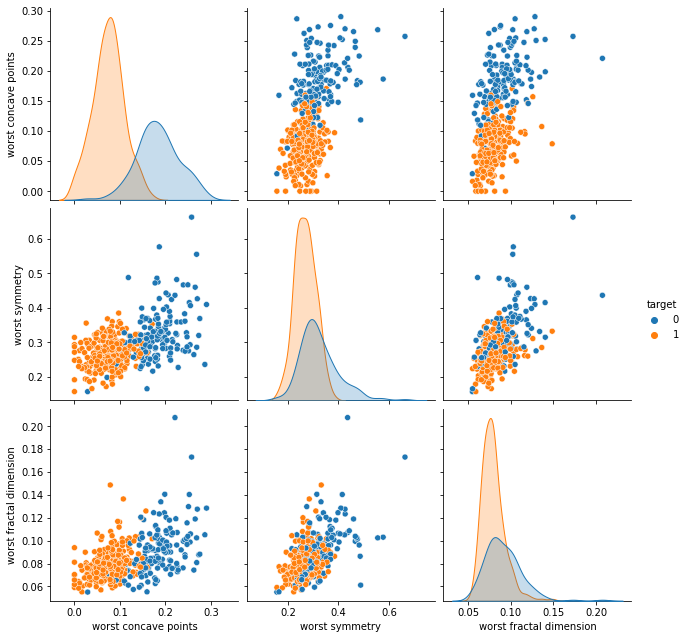

In [185]:
df_pair = df.loc[:,['worst concave points', 'worst symmetry', 'worst fractal dimension','target']]

sns.pairplot(df_pair, hue = 'target', height = 3)

In [186]:
#from the prevoius plot
#there are some feature  easy to separate the classes using them like(worst concave points ,worst fraction dimension ,,.) 

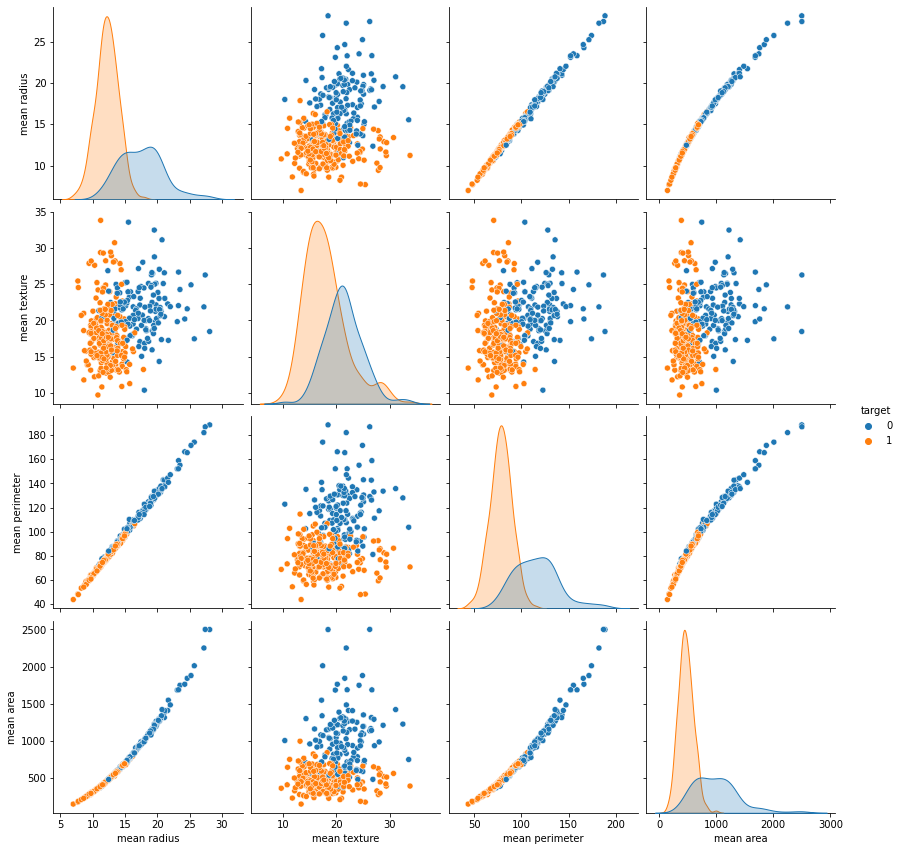

In [187]:
df_pair = df.loc[:,['mean radius', 'mean texture', 'mean perimeter', 'mean area','target']]

sns.pairplot(df_pair, hue = 'target', height = 3)

In [188]:
#there are somefeature correlated with other

In [189]:
col_name=names.drop('target')
xtrain=pd.DataFrame(x_train,columns=col_name)

In [190]:
# compute correlation matrix using pandas corr() function
corr_df =xtrain.corr() 
# display first few rows/columns of correlation matrix using iloc fucntion in Pandas
corr_df.iloc[0:5,0:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean radius,1.000000,0.295249,0.998198,0.986838,0.173862
mean texture,0.295249,1.000000,0.301988,0.297965,-0.019339
mean perimeter,0.998198,0.301988,1.000000,0.986457,0.207606
mean area,0.986838,0.297965,0.986457,1.000000,0.179881
mean smoothness,0.173862,-0.019339,0.207606,0.179881,1.000000


In [191]:
#feature correlation with target
thresh = 0.8
# Create correlation matrix
corr_matrix = xtrain.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than ...
to_drop_corr = [column for column in upper.columns if any(upper[column] > thresh)]
col_correlated=to_drop_corr
#col_correlated

In [192]:
#dropping col that has less effect on target
df_xtrain=pd.DataFrame(xtrain,columns=col_correlated)
#df_xtrain.columns
df_xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean perimeter           398 non-null    float64
 1   mean area                398 non-null    float64
 2   mean concavity           398 non-null    float64
 3   mean concave points      398 non-null    float64
 4   perimeter error          398 non-null    float64
 5   area error               398 non-null    float64
 6   worst radius             398 non-null    float64
 7   worst texture            398 non-null    float64
 8   worst perimeter          398 non-null    float64
 9   worst area               398 non-null    float64
 10  worst smoothness         398 non-null    float64
 11  worst compactness        398 non-null    float64
 12  worst concavity          398 non-null    float64
 13  worst concave points     398 non-null    float64
 14  worst fractal dimension  3

# HeapMap

<AxesSubplot:>

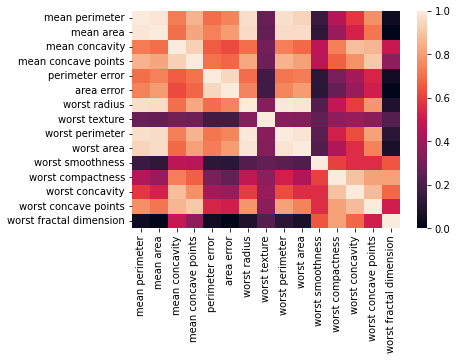

In [193]:
corr = df_xtrain.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,vmin=0,vmax=1)

In [194]:
tested_x=pd.DataFrame(x_text,columns=colname)
cor_tested_x=pd.DataFrame(tested_x,columns=col_correlated)
#cor_tested_x.info()

# train  mode without PCA

In [195]:
train_y=y_train.reset_index(drop=True)
train_y.shape

(398,)

In [200]:
m = LogisticRegression(random_state=0)
train_model=m.fit(df_xtrain, train_y)


In [197]:
ypre=train_model.predict(cor_tested_x)


In [198]:
accurcy =metrics.accuracy_score(y_test,ypre)
accurcy

0.9766081871345029

In [147]:
print(classification_report(y_test, ypre))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, ypre))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

-------------------------------------------------------
Confusion Matrix

[[ 60   3]
 [  1 107]]


# classification report

In [ ]:
print(classification_report(y_test, ypre))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

# f1Score

# PCA  for reduction dimension

In [39]:
#from the heatmap there are corraltion between some feature and other so can apply dimentionality reduction
#PCA

pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(df_xtrain)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [40]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.66812391 0.16805841]


In [41]:
#from the prevoius resualt 66 % from infromation and 16 % from info  

In [42]:
df_PCA_x=pd.concat([principal_breast_Df,y_train.reset_index(drop=True)],axis=1)

In [43]:
tested_data=pd.DataFrame(df_xtest,columns=col_correlated)
tested_data.shape

(171, 15)

In [44]:
principalComponents_breast = pca_breast.transform(tested_data)
principal_breast_Df_test = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [45]:
tested_y=y_test.reset_index(drop=True)
df_test=pd.concat([principal_breast_Df_test,tested_y],axis=1)
df_test

,principal component 1,principal component 2,target
0,0.615134,-2.186820,0
1,-1.837108,0.612169,1
2,-1.741928,1.310323,1
3,-1.331829,0.761161,1
4,-2.382931,1.543428,1
...,...,...,...
166,0.764195,-1.379488,0
167,1.902490,-0.778253,0
168,-0.838709,-0.413017,1
169,-1.629093,0.909634,1


In [165]:
#lets`s to train our model (Logistic regression)
#train_model = LogisticRegression(random_state=0).fit(df_PCA_x, y_train)



In [109]:
ypre=train_model.predict(df_test)
#ypre

In [51]:
s =metrics.accuracy_score(y_test,ypre)

In [52]:
s  ##there is something wrong

1.0

# Gradient Descent with Logistic Regression from scratch

In [ ]:
#i will use the prevoius preprocessing to prdiect model

In [ ]:
#we need sigmoid function  and loss function 

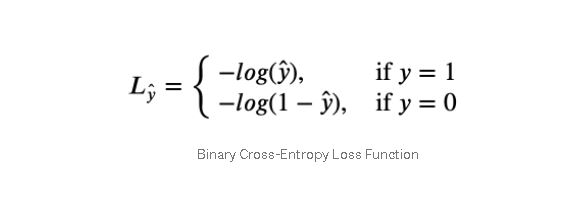

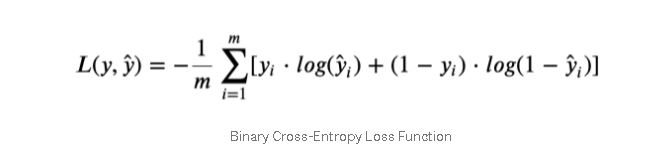

In [149]:
class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                   
        z = dot(X, weights)        
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))        
        return -sum(predict_1 + predict_0) / len(X)  #cost function of logistic regrassion
    
    def fit(self, X, y, epochs=25, lr=0.05):  #train model to optimize parameter      
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]


# prediction

In [154]:
logreg = LogisticRegression()
logreg.fit(df_xtrain, y_train, epochs=500, lr=0.7)
y_pred = logreg.predict(cor_tested_x)
#y_pred

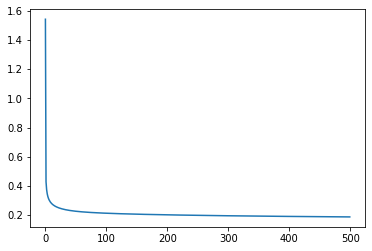

In [158]:
#plot loss 
plt.plot(logreg.loss)

# Evaluation

In [155]:
print(classification_report(y_test, y_pred))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        63
           1       1.00      0.82      0.90       108

    accuracy                           0.89       171
   macro avg       0.88      0.91      0.89       171
weighted avg       0.91      0.89      0.89       171

-------------------------------------------------------
Confusion Matrix

[[63  0]
 [19 89]]
